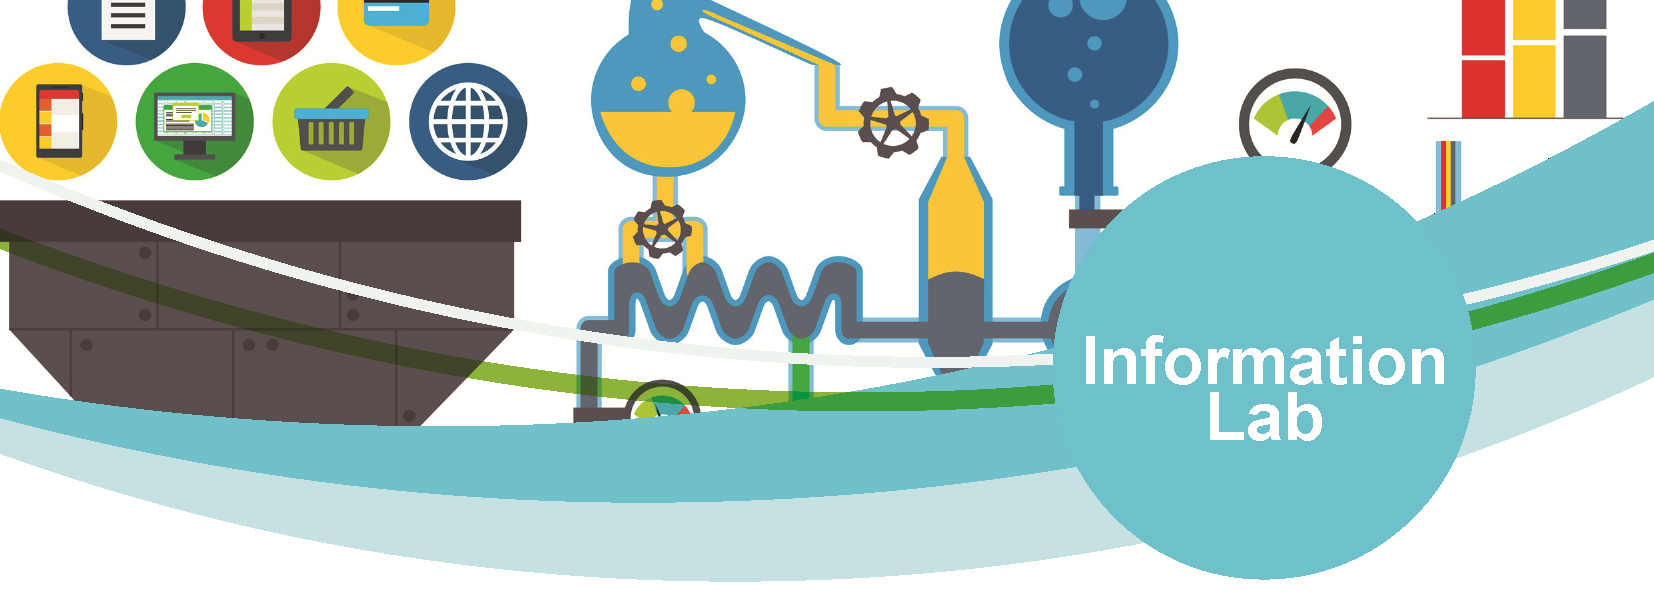

<h1>Python Plots - Deviation</h1>

Examples of graphs used for Deviations using the MatplotLib and Seaborn Python Packages.

Prepared by: Lee Matthews <br>

Source Material: <br>
https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

Data Dictionaries: <br>
http://www.sthda.com/english/wiki/r-built-in-data-sets#mtcars-motor-trend-car-road-tests<br>
https://ggplot2.tidyverse.org/reference/economics.html


In [1]:
# Setup - Limited parts needed per plot.


import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

2.0.2
0.7.1


To run the code below you will need to map //finbilab01/COP_Repo to a lettered drive (I have used E:) as shown in the images below or alternatively download the data to your local drive and repoint the code to find them.

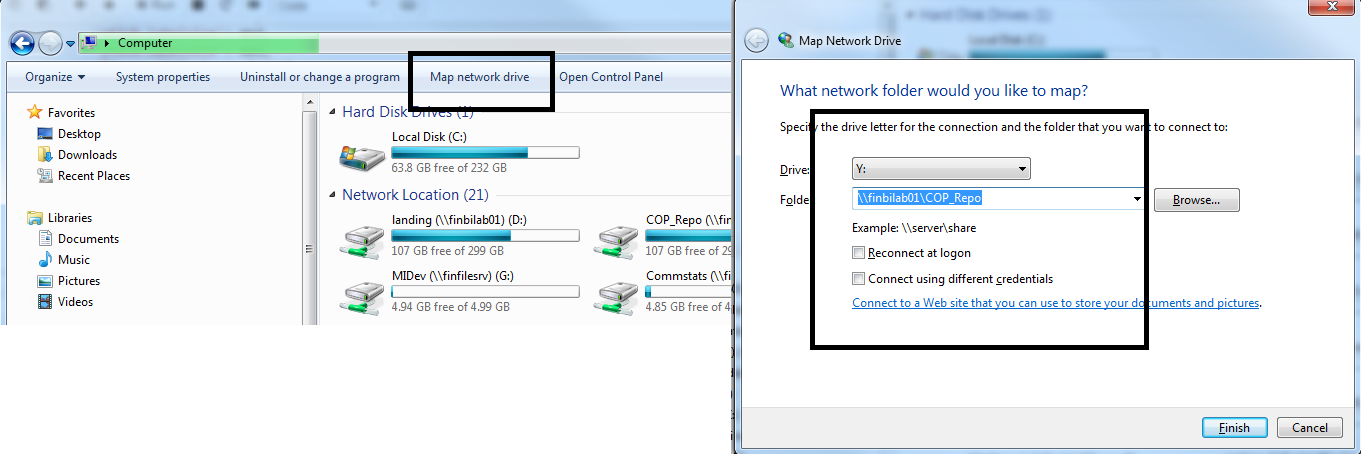

In [13]:
# Import Global Datasets - Datasets are stored in //finbilab01/COP_Repo/Code_Cache/Python/Datasets

mt = pd.read_csv("j:/Code_Cache/Python/Datasets/mtcars.csv")
eco = pd.read_csv("j:/Code_Cache/Python/Datasets/economics.csv", parse_dates=['date']).head(100)

In [14]:
# Check the mtcars file has loaded correctly
mt.head(15)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout
5,4.254409,6,225.0,105,2.76,3.460,20.22,1,0,3,1,1,Valiant,Valiant
6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360
7,4.939636,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1,Merc 240D,Merc 240D
8,4.774935,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1,Merc 230,Merc 230
9,4.381780,6,167.6,123,3.92,3.440,18.30,1,0,4,4,1,Merc 280,Merc 280


In [15]:
# Check the economics files has loaded correctly
eco.head(15)

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066
5,1967-12-01,525.8,199657,12.1,4.8,3018
6,1968-01-01,531.5,199808,11.7,5.1,2878
7,1968-02-01,534.2,199920,12.2,4.5,3001
8,1968-03-01,544.9,200056,11.6,4.1,2877
9,1968-04-01,544.6,200208,12.2,4.6,2709


<h2>1. Diverging Bars plot

If you want to see how the items are varying based on a single metric and visualize the order and amount of this variance, the diverging bars is a great tool. It helps to quickly differentiate the performance of groups in your data and is quite intuitive and instantly conveys the point.

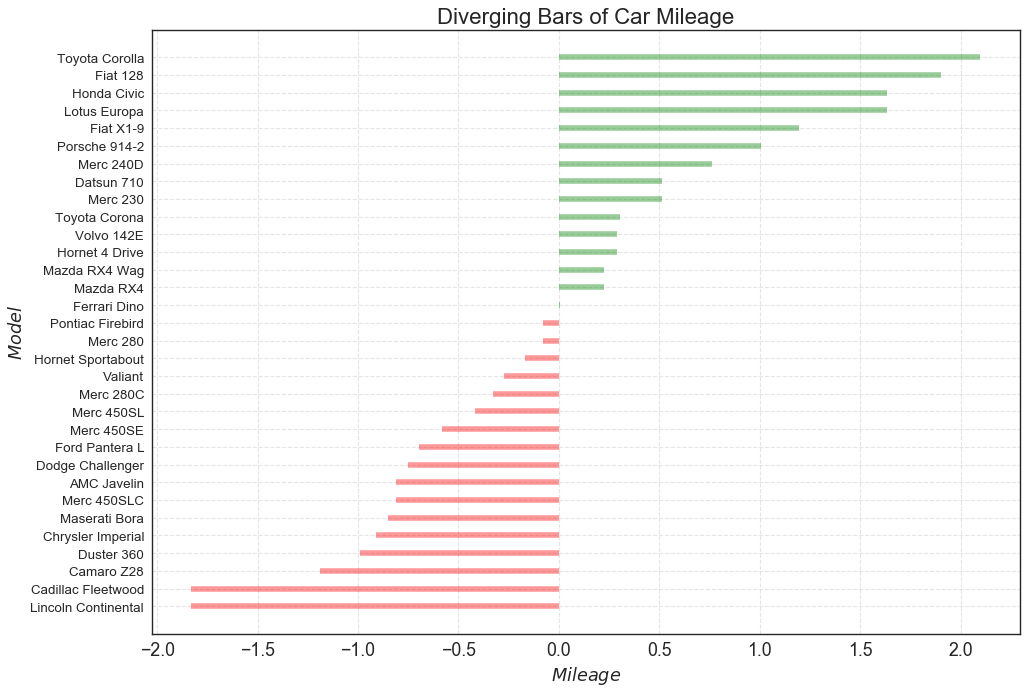

In [16]:
# Prepare Data
x = mt.loc[:, ['mpg']]
mt['mpg_z'] = (x - x.mean())/x.std()
mt['colors'] = ['red' if x < 0 else 'green' for x in mt['mpg_z']]
mt.sort_values('mpg_z', inplace=True)
mt.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=mt.index, xmin=0, xmax=mt.mpg_z, color=mt.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
plt.yticks(mt.index, mt.cars, fontsize=12)
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

<h2>2. Diverging Text Bars plot

__Diverging text__ is similar to diverging bars and it preferred if you want to show the value of each items within the chart in a nice and presentable way.

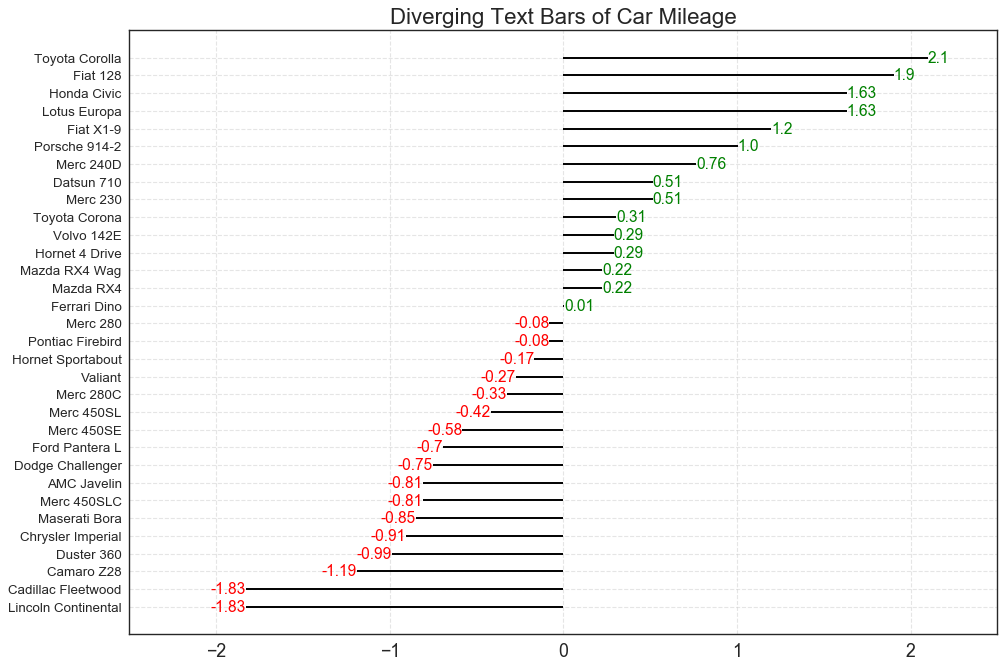

In [17]:
# Prepare Data
x = mt.loc[:, ['mpg']]
mt['mpg_z'] = (x - x.mean())/x.std()
mt['colors'] = ['red' if x < 0 else 'green' for x in mt['mpg_z']]
mt.sort_values('mpg_z', inplace=True)
mt.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=mt.index, xmin=0, xmax=mt.mpg_z)
for x, y, tex in zip(mt.mpg_z, mt.index, mt.mpg_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':14})

# Decorations    
plt.yticks(mt.index, mt.cars, fontsize=12)
plt.title('Diverging Text Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

<h2>3. Diverging Dot Plot

__Divering dot plot__ is also similar to the _diverging bars_. However compared to diverging bars, the absence of bars reduces the amount of contrast and disparity between the groups.

May not run if plot number 1 has already executed - If so clear the output for plot 1 using Cell -> Current Ouputs -> Clear and run Plot 3.

In [18]:
# Prepare Data
x = mt.loc[:, ['mpg']]
mt['mpg_z'] = (x - x.mean())/x.std()
mt['colors'] = ['red' if x < 0 else 'darkgreen' for x in mt['mpg_z']]
mt.sort_values('mpg_z', inplace=True)


# Draw plot
plt.figure(figsize=(14,16), dpi= 80)
plt.scatter(mt.mpg_z, mt.index, s=450, alpha=.6, color=mt.colors)
for x, y, tex in zip(mt.mpg_z, mt.index, mt.mpg_z):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='center', 
                 verticalalignment='center', fontdict={'color':'white'})

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.yticks(mt.index, mt.cars)
plt.title('Diverging Dotplot of Car Mileage', fontdict={'size':20})
plt.xlabel('$Mileage$')
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

ValueError: cannot insert level_0, already exists

<h2>4. Diverging Lollipop Chart with Markers

__Lollipop with markers__ provides a flexible way of visualizing the divergence by laying emphasis on any significant datapoints you want to bring attention to and give reasoning within the chart appropriately.

In [19]:
# Prepare Data
x = mt.loc[:, ['mpg']]
mt['mpg_z'] = (x - x.mean())/x.std()
mt['colors'] = 'black'

# color fiat differently
mt.loc[mt.cars == 'Fiat X1-9', 'colors'] = 'darkorange'
mt.sort_values('mpg_z', inplace=True)



# Draw plot
import matplotlib.patches as patches

plt.figure(figsize=(14,16), dpi= 80)
plt.hlines(y=mt.index, xmin=0, xmax=mt.mpg_z, color=mt.colors, alpha=0.4, linewidth=1)
plt.scatter(mt.mpg_z, mt.index, color=mt.colors, s=[600 if x == 'Fiat X1-9' else 300 for x in mt.cars], alpha=0.6)
plt.yticks(mt.index, mt.cars)
plt.xticks(fontsize=12)

# Annotate
plt.annotate('Mercedes Models', xy=(0.0, 11.0), xytext=(1.0, 11), xycoords='data', 
            fontsize=15, ha='center', va='center',
            bbox=dict(boxstyle='square', fc='firebrick'),
            arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1.5', lw=2.0, color='steelblue'), color='white')

# Add Patches
p1 = patches.Rectangle((-2.0, -1), width=.3, height=3, alpha=.2, facecolor='red')
p2 = patches.Rectangle((1.5, 27), width=.8, height=5, alpha=.2, facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# Decorate
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()


ValueError: cannot insert level_0, already exists

<h2>5. Area Chart

By coloring the area between the axis and the lines, the __area chart__ throws more emphasis not just on the peaks and troughs but also the duration of the highs and lows. The longer the duration of the highs, the larger is the area under the line.

AttributeError: 'DatetimeProperties' object has no attribute 'month_name'

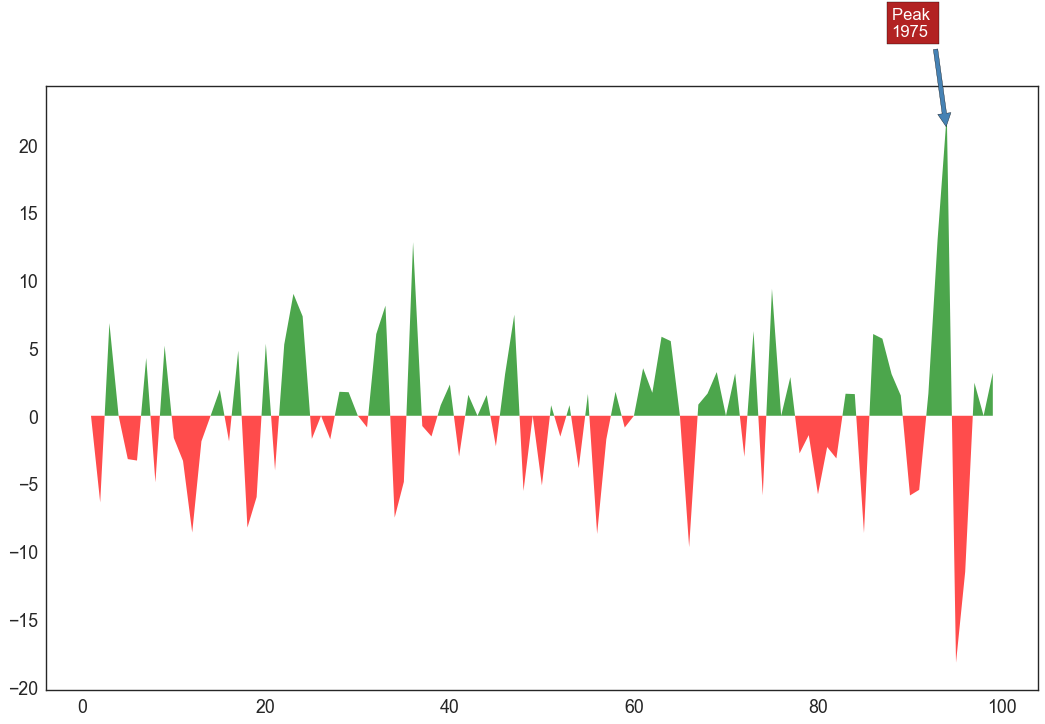

In [20]:
# Prepare Data
x = np.arange(eco.shape[0])
y_returns = (eco.psavert.diff().fillna(0)/eco.psavert.shift(1)).fillna(0) * 100

# Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)

# Annotate
plt.annotate('Peak \n1975', xy=(94.0, 21.0), xytext=(88.0, 28),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')


# Decorations
xtickvals = [str(m)[:3].upper()+"-"+str(y) for y,m in zip(eco.date.dt.year, eco.date.dt.month_name())]
plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6], rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'baseline'})
plt.ylim(-35,35)
plt.xlim(1,100)
plt.title("Month Economics Return %", fontsize=22)
plt.ylabel('Monthly returns %')
plt.grid(alpha=0.5)
plt.show()